### Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

### ALP_Statistics



In [6]:
df = r"C:\Users\Angch\Probability Statistics Python 2025\Week 12 Stuff CSV\RealEstateDataSet.xlsx" # Path to the Real Estate Valuation dataset (CSV format)
df_housing = pd.read_excel(df) # Read the dataset into the 'df_housing' DataFrame, which will be used for subsequent analysis.
df_housing = df_housing.drop('No', axis=1) # Drops the No table since its not really needed for the analysis

In [8]:
print(df_housing.head().to_string())
#Printing the head of the Real estate evaluation dataframe to check if its loaded correctly, the ".to_string())" is solely used to make the print looks more neat

   X1 transaction date  X2 house age  X3 distance to the nearest MRT station  X4 number of convenience stores  X5 latitude  X6 longitude  Y house price of unit area
0          2012.916667          32.0                                84.87882                               10     24.98298     121.54024                        37.9
1          2012.916667          19.5                               306.59470                                9     24.98034     121.53951                        42.2
2          2013.583333          13.3                               561.98450                                5     24.98746     121.54391                        47.3
3          2013.500000          13.3                               561.98450                                5     24.98746     121.54391                        54.8
4          2012.833333           5.0                               390.56840                                5     24.97937     121.54245                        43.1


In [10]:
df_housing.shape
#The shape of the dataframe, we can infere that the dataframe we are using has 414 rows and 7 columns (The original column is 8, but we dropped the No column so its only 7)

(414, 7)

In [12]:
df_housing.describe()
# Display the Univariate Data Characteristics 
# count: The number of non-missing (non-NaN) values. 
# mean: The average value. 
# std (Standard Deviation): A measure of how spread out the values are from the mean. A low standard deviation means data points tend to be close to the mean; a high standard deviation means data points are spread out over a wider range of values.
# min: The minimum value in the column.
# 25% (or Q1 - First Quartile): The value below which 25% of the data falls.
# 50% (or Q2 - Median): The middle value of the dataset. 50% of the data is below this value, and 50% is above. 
# 75% (or Q3 - Third Quartile): The value below which 75% of the data falls.
# max: The maximum value in the column. 

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,2013.148953,17.712560,1083.885689,4.094203,24.969030,121.533361,37.980193
std,0.281995,11.392485,1262.109595,2.945562,0.012410,0.015347,13.606488
min,2012.666667,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,2012.916667,9.025000,289.324800,1.000000,24.963000,121.528085,27.700000
50%,2013.166667,16.100000,492.231300,4.000000,24.971100,121.538630,38.450000
75%,2013.416667,28.150000,1454.279000,6.000000,24.977455,121.543305,46.600000
max,2013.583333,43.800000,6488.021000,10.000000,25.014590,121.566270,117.500000


### Exploratory Data Analysis (Univariate)

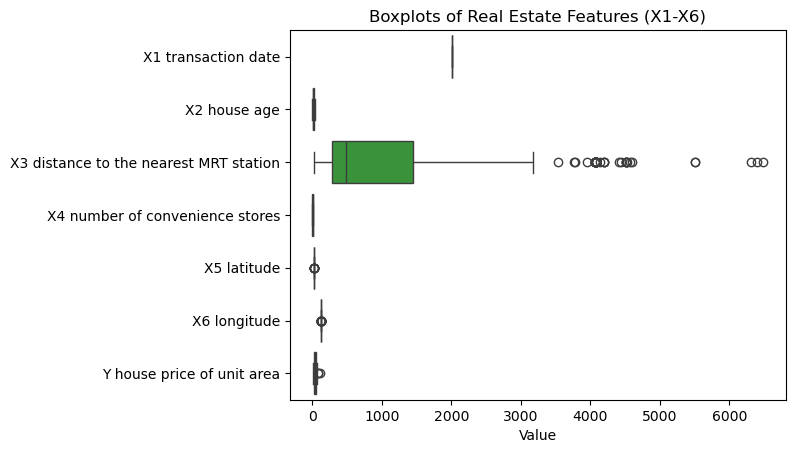

In [15]:
# Display Graphical Univariate EDA using box plot to analyze data distribution
x_columns = ['X1 transaction date', 'X2 house age', 'X3 distance to the nearest MRT station',
             'X4 number of convenience stores', 'X5 latitude', 'X6 longitude', 'Y house price of unit area']

# Create the boxplot for the selected 'X' columns
sns.boxplot(data=df_housing[x_columns], orient='h')
plt.title('Boxplots of Real Estate Features (X1-X6)') 
plt.xlabel('Value') 
plt.show()

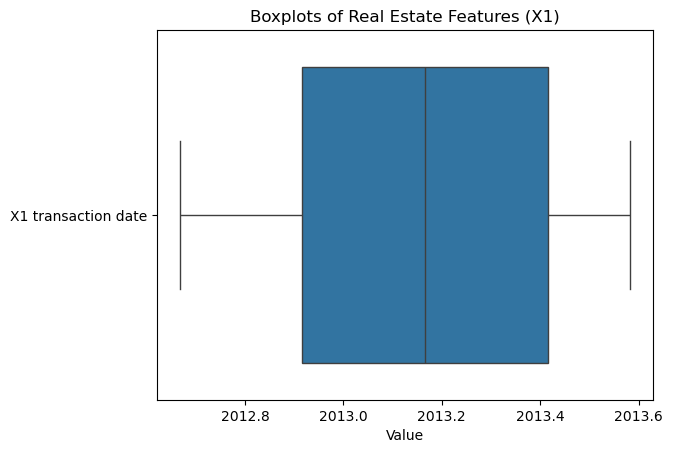

In [17]:
x_columns = ['X1 transaction date']  # The boxplot only shows the distribution of 'X1 transaction date'.

sns.boxplot(data=df_housing[x_columns], orient='h')
 # 'data=df_housing[x_columns]' specifies the data to be plotted.
                                                    # 'orient='h'' makes the boxplot horizontal.
                                                    # The boxplot shows the distribution of transaction date.
                                                    # The box represents the interquartile range (IQR), from the 25th percentile (Q1) to the 75th percentile (Q3).
                                                    # The vertical line inside the box is the median (50th percentile).
                                                    # The "whiskers" extend from the box, showing the general spread of non-outlier data
                                                    # Points outside the whiskers are considered outliers.
plt.title('Boxplots of Real Estate Features (X1)')
plt.xlabel('Value') 
plt.show()

 # From the plot, we can see the median transaction date is around 2013.2. (indicated by the vertical line)
           # The majority of transactions (the box) occurred roughly between 2012.9 and 2013.4.
           # The whiskers show the overall spread of transaction dates, from around 2012.6 to 2013.5.
           # There are no apparent outliers shown beyond the whiskers in this particular plot.

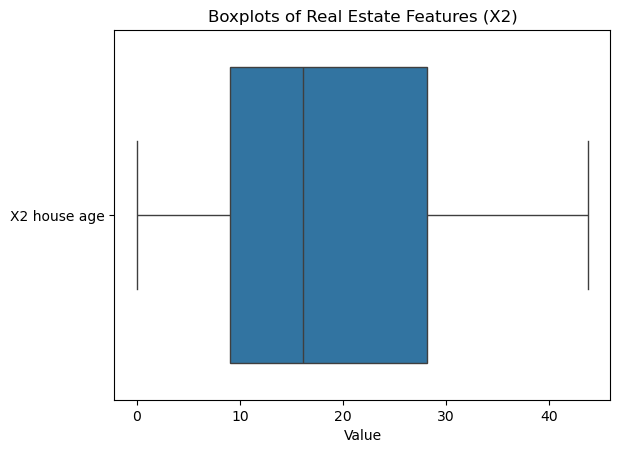

In [19]:
x_columns = ['X2 house age'] # The boxplot only shows the distribution of 'X2 House Age'

sns.boxplot(data=df_housing[x_columns], orient='h') # This creates a boxplot.
                                                    # 'data=df_housing[x_columns]' specifies the data to be plotted.
                                                    # 'orient='h'' makes the boxplot horizontal.
                                                    # The boxplot shows the distribution of house age.
                                                    # The box represents the interquartile range (IQR), from the 25th percentile (Q1) to the 75th percentile (Q3).
                                                    # The vertical line inside the box is the median (50th percentile).
                                                    # The "whiskers" extend from the box, showing the general spread of non-outlier data.
                                                    # Data points falling outside these whiskers are plotted individually as outliers.
plt.title('Boxplots of Real Estate Features (X2)')
plt.xlabel('Value') 
plt.show()

  # From the plot, we can see the median house age is 16.100000 years.
           # The majority of house ages (the box, representing the IQR) are between 9.025000 and 28.150000 years.
           # The whiskers show the overall spread of house ages, from 0.000000 to 43.800000 years.
           # There are no apparent outliers shown beyond the whiskers in this particular plot.

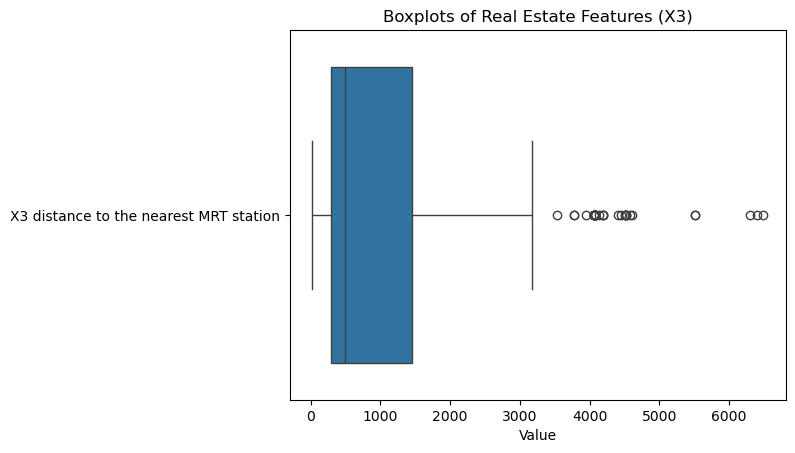

In [21]:
x_columns = [ 'X3 distance to the nearest MRT station'] # This line selects the 'X3 distance to the nearest MRT station' column for visualization.

sns.boxplot(data=df_housing[x_columns], orient='h') # 'data=df_housing[x_columns]' specifies the data to be plotted.
                                                    # 'orient='h'' makes the boxplot horizontal.
                                                    # The boxplot visually summarizes the distribution of distances to the nearest MRT station.
                                                    # The box itself spans the interquartile range (IQR), from the 25th percentile (Q1) to the 75th percentile (Q3).
                                                    # The vertical line within the box indicates the median (50th percentile) distance.
                                                    # The "whiskers" extend from the box, showing the general spread of non-outlier data.
                                                    # Data points falling outside these whiskers are plotted individually as outliers.
plt.title('Boxplots of Real Estate Features (X3)')
plt.xlabel('Value') 
plt.show()

 # From the plot, we can see the median distance to the nearest MRT station is 492.231300 units.
           # The majority of distances (the box, representing the IQR) are between 289.324800 and 1454.279000 units.
           # The whiskers show the spread of the non-outlier data, with the left whisker starting at 23.382840 units and the right whisker extending to a value somewhat below 3500.
           # There are several apparent outliers shown as individual points beyond the right whisker, indicating some properties are significantly further from an MRT station than the bulk of the properties.
           # The maximum recorded distance is 6488.021000 units.

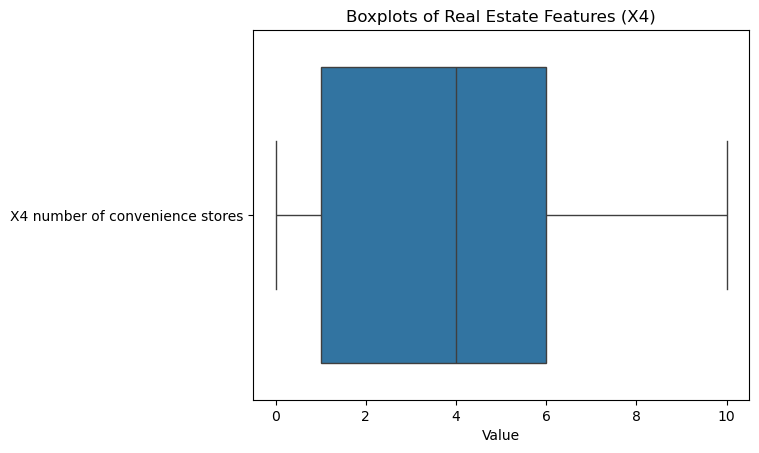

In [23]:
x_columns = ['X4 number of convenience stores']  # This line selects the 'X4 number of convenience stores' column for visualization.


sns.boxplot(data=df_housing[x_columns], orient='h') # 'data=df_housing[x_columns]' specifies the data to be plotted.
                                                    # 'orient='h'' makes the boxplot horizontal.
                                                    # The boxplot visually summarizes the distribution of the number of convenience stores.
                                                    # The box itself spans the interquartile range (IQR), from the 25th percentile (Q1) to the 75th percentile (Q3).
                                                    # The vertical line within the box indicates the median (50th percentile) number of stores.
                                                    # The "whiskers" extend from the box, showing the general spread of non-outlier data.
                                                    # Data points falling outside these whiskers are plotted individually as outliers

plt.title('Boxplots of Real Estate Features (X4)')
plt.xlabel('Value') 
plt.show()

   # From the plot, we can see the median number of convenience stores is 4.000000.
           # The majority of locations (the box, representing the IQR) have between 1.000000 and 6.000000 convenience stores.
           # The whiskers show the overall spread of the number of convenience stores, from 0.000000 to 10.000000.
           # There are no apparent outliers shown beyond the whiskers in this particular plot, as the whiskers extend to the minimum and maximum values in the dataset.

<function matplotlib.pyplot.show(close=None, block=None)>

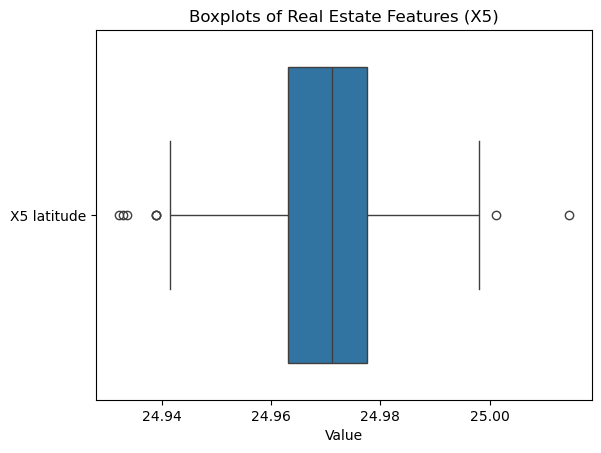

In [25]:
x_columns = ['X5 latitude'] 

sns.boxplot(data=df_housing[x_columns], orient='h') # 'data=df_housing[x_columns]' specifies the data to be plotted.
                                                    # 'orient='h'' makes the boxplot horizontal.
                                                    # The boxplot visually summarizes the distribution of latitudes.
                                                    # The box itself spans the interquartile range (IQR), from the 25th percentile (Q1) to the 75th percentile (Q3).
                                                    # The vertical line within the box indicates the median (50th percentile) latitude.
                                                    # The "whiskers" extend from the box, showing the general spread of non-outlier data.
                                                    # Data points falling outside these whiskers are plotted individually as outliers.


plt.title('Boxplots of Real Estate Features (X5)')
plt.xlabel('Value') 
plt.show 

 # From the plot, we can see the median latitude is 24.971100.
           # The majority of latitudes (the box, representing the IQR) are between 24.963000 and 24.977455.
           # The whiskers show the spread of the non-outlier data.
           # There are several apparent outliers shown as individual points beyond both the left (lower) and right (upper) whiskers.
           # Specifically, the minimum latitude is 24.932070 and the maximum is 25.014590. The plot shows points near these extremes as outliers,
           # indicating that some properties have latitudes that are unusually low or high compared to the bulk of the properties in this dataset.


<function matplotlib.pyplot.show(close=None, block=None)>

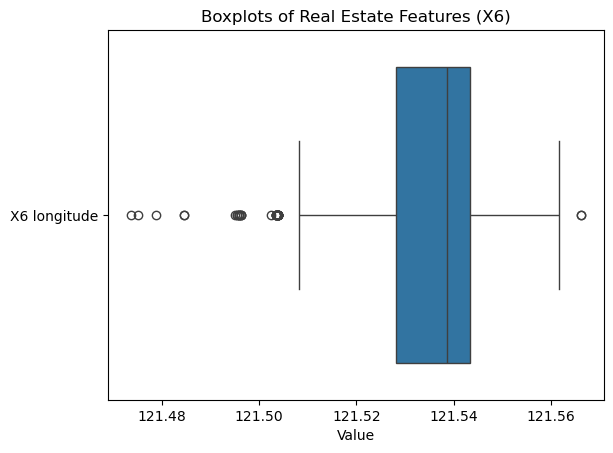

In [27]:
x_columns = ['X6 longitude'] # This line selects the 'X6 longitude' column from the dataframe for visualization.

sns.boxplot(data=df_housing[x_columns], orient='h') # 'data=df_housing[x_columns]' specifies the data to be plotted.
                                                    # 'orient='h'' makes the boxplot horizontal.
                                                    # The boxplot visually summarizes the distribution of longitudes.
                                                    # The box itself spans the interquartile range (IQR), from the 25th percentile (Q1) to the 75th percentile (Q3).
                                                    # The vertical line within the box indicates the median (50th percentile) longitude.
                                                    # The "whiskers" extend from the box, showing the general spread of non-outlier data.
                                                    # Data points falling outside these whiskers are plotted individually as outliers.

plt.title('Boxplots of Real Estate Features (X6)')
plt.xlabel('Value') 
plt.show

# From the plot, we can see the median longitude is 121.538630.
           # The majority of longitudes (the box, representing the IQR) are between 121.528085 and 121.543305.
           # The whiskers show the spread of the non-outlier data.
           # There are several apparent outliers shown as individual points beyond both the left (lower) and right (upper) whiskers.
           # Specifically, the minimum longitude is 121.473530 and the maximum is 121.566270. The plot shows points near these extremes as outliers,
           # indicating that some properties have longitudes that are unusually low or high compared to the bulk of the properties in this dataset.

<function matplotlib.pyplot.show(close=None, block=None)>

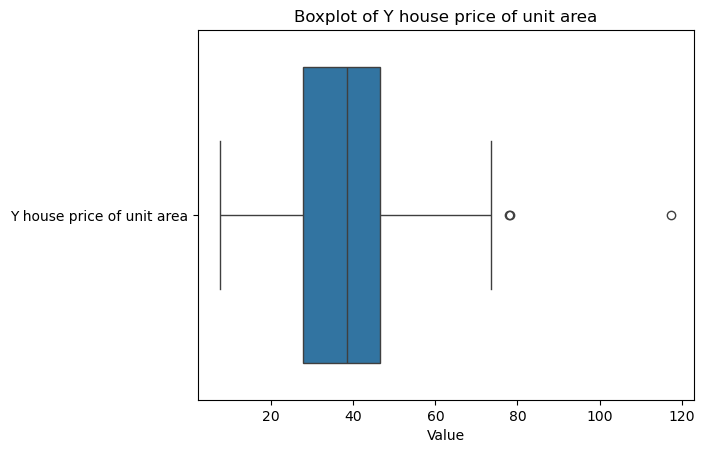

In [29]:
y_columns = ['Y house price of unit area'] # This line selects the 'Y house price of unit area' column from the dataframe for visualization.

sns.boxplot(data=df_housing[y_columns], orient='h') # 'data=df_housing[x_columns]' specifies the data to be plotted.
                                                    # 'orient='h'' makes the boxplot horizontal.
                                                    # The boxplot visually summarizes the distribution of longitudes.
                                                    # The box itself spans the interquartile range (IQR), from the 25th percentile (Q1) to the 75th percentile (Q3).
                                                    # The vertical line within the box indicates the median (50th percentile) longitude.
                                                    # The "whiskers" extend from the box, showing the general spread of non-outlier data.
                                                    # Data points falling outside these whiskers are plotted individually as outliers.

plt.title('Boxplot of Y house price of unit area')
plt.xlabel('Value') 
plt.show

 # From the plot, we can see the median house price of unit area is 38.450000.
           # The majority of house prices of unit area (the box, representing the IQR) are between 27.700000 and 46.600000.
           # The whiskers show the spread of the non-outlier data. The lower whisker extends down to 7.600000 (the minimum).
           # There are apparent outliers shown as individual points beyond the upper whisker, indicating some properties have significantly higher
           #  prices per unit area. The maximum recorded price per unit area is 117.500000.

### Exploratory Data Analysis (Multivariate)

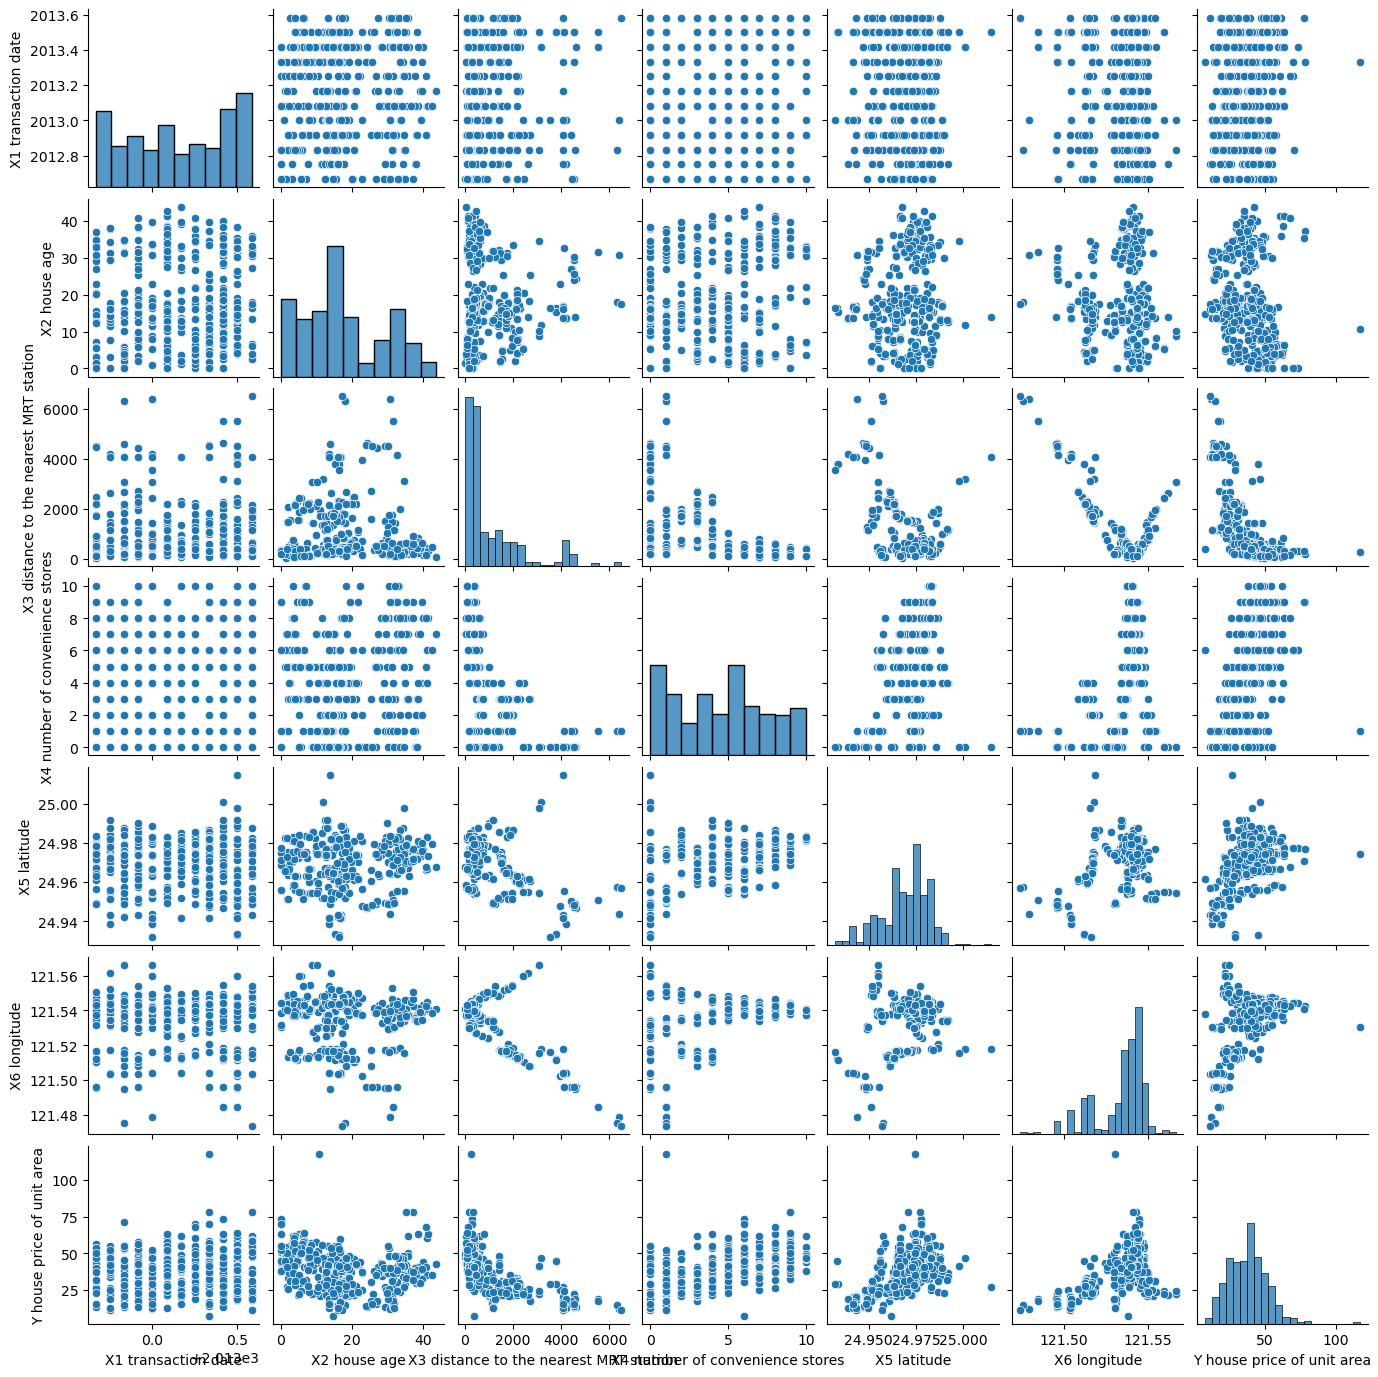

In [31]:
sns.pairplot(data=df_housing, height=2)
plt.show()

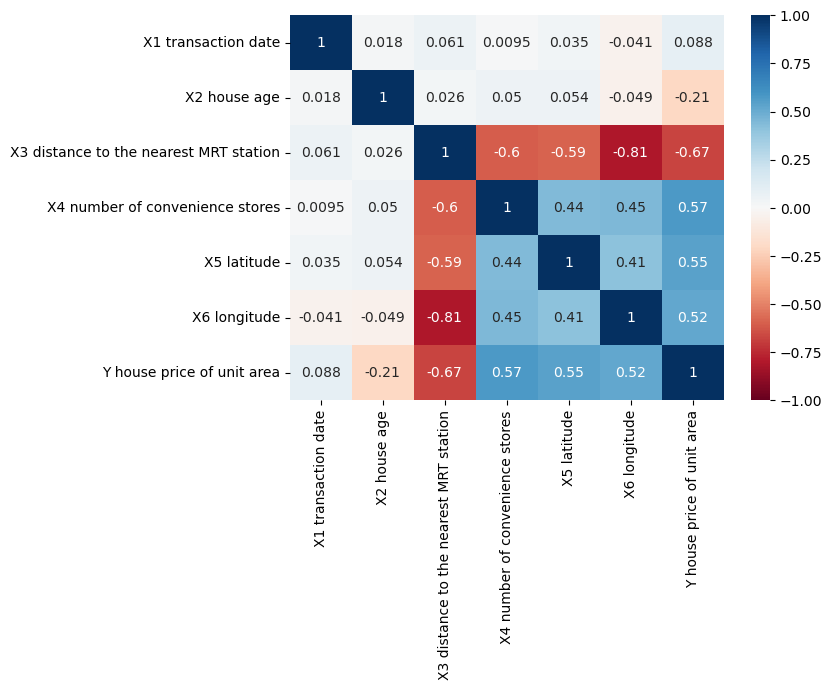

In [33]:
plt.subplots(figsize=(7,5))
sns.heatmap(df_housing.corr(), vmin=-1, vmax=1, cmap="RdBu", annot=True)
plt.show()

In [35]:
from sklearn.model_selection import train_test_split
X = df_housing.iloc[:, :-1].values
# Selects all rows and only the last column from df_housing as the target variable (y).
# .values converts the DataFrame slice to a NumPy array.
# Last column is the one we want to predict

y = df_housing.iloc[:, -1].values
# Selects all rows and all columns except the last one from df_housing as features (X).
# .values converts the DataFrame slice to a NumPy array.

In [39]:
result = LinearRegression()
result.fit(X, y)

print("Intercept: {:0.4f}".format(result.intercept_))
print("Coefficient b1 (X1 transaction date): {:0.4f}".format(result.coef_[0]))
print("Coefficient b2 (X2 house age): {:0.4f}".format(result.coef_[1]))
print("Coefficient b3 (X3 distance to the nearest MRT station): {:0.4f}".format(result.coef_[2]))
print("Coefficient b4 (X4 number of convenience stores): {:0.4f}".format(result.coef_[3]))
print("Coefficient b5 (X5 latitude): {:0.4f}".format(result.coef_[4]))
print("Coefficient b6 (X6 longitude): {:0.4f}".format(result.coef_[5]))


print('\n Regression Equation: y = {:0.4f}*X1_transaction_date + {:0.4f}*X2_house_age + {:0.4f}*X3_distance_MRT + {:0.4f}*X4_convenience_stores + {:0.4f}*X5_latitude + {:0.4f}*X6_longitude + {:0.4f}'
      .format(result.coef_[0], result.coef_[1], result.coef_[2], result.coef_[3], result.coef_[4], result.coef_[5],result.intercept_))


# --- Display the Coefficient of Determination ---
print('\nCoefficient of Determination (R-squared) is {:0.4f}'.format(result.score(X, y)))

Intercept: -14441.9827
Coefficient b1 (X1 transaction date): 5.1490
Coefficient b2 (X2 house age): -0.2697
Coefficient b3 (X3 distance to the nearest MRT station): -0.0045
Coefficient b4 (X4 number of convenience stores): 1.1333
Coefficient b5 (X5 latitude): 225.4701
Coefficient b6 (X6 longitude): -12.4291

 Regression Equation: y = 5.1490*X1_transaction_date + -0.2697*X2_house_age + -0.0045*X3_distance_MRT + 1.1333*X4_convenience_stores + 225.4701*X5_latitude + -12.4291*X6_longitude + -14441.9827

Coefficient of Determination (R-squared) is 0.5824


### Testing 1 

In [47]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

df_path = r"C:\Users\Angch\Probability Statistics Python 2025\Week 12 Stuff CSV\RealEstateDataSet.xlsx" # Path to the Real Estate Valuation dataset (CSV format)
df_housing2 = pd.read_excel(df_path) # Read the dataset
df_housing2 = df_housing2.drop(['No'], axis=1)

X = df_housing2.iloc[:, :-1].values
y = df_housing2.iloc[:, -1].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.15, random_state = 0)
y_pred = result.predict(X_test)
result = LinearRegression()
result.fit(X_train, y_train)

r_squared_test = result.score(X_test, y_test)
print(f'Coefficient of Determination (R-squared) on TEST set: {r_squared_test:0.4f}')
print('Root Mean Squared Error (RMSE): {:0.4f}'.format(np.sqrt(mean_squared_error(y_test, y_pred))))
print('Mean Squared Error (MSE): {:0.4f}'.format(mean_squared_error(y_test, y_pred)))

Coefficient of Determination (R-squared) on TEST set: 0.6801
Root Mean Squared Error (RMSE): 6.9213
Mean Squared Error (MSE): 47.9048


In [49]:
#Testing the Regression equation

hp_pred = result.predict([[2013.5, 10, 500, 5, 24.97, 121.53]]) # hp_pred for House Price prediction, the elements inside the array must be the same amount as the one in the columns (6)
print('House Price Prediction is {:.4f}'.format(hp_pred[0]))

House Price Prediction is 45.5348
